In [19]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
% matplotlib inline
from matplotlib import pyplot as plt
import geocoder as geo


In [2]:
felony_df = pd.read_csv("NYPD_7_Major_Felony_Incidents.csv", parse_dates = "Occurrence Date")
felony_df.head()

,OBJECTID,Identifier,Occurrence Date,Day of Week,Occurrence Month,Occurrence Day,Occurrence Year,Occurrence Hour,CompStat Month,CompStat Day,CompStat Year,Offense,Offense Classification,Sector,Precinct,Borough,Jurisdiction,XCoordinate,YCoordinate,Location 1
0,1.0,f070032d,09/06/1940 07:30:00 PM,Friday,Sep,6.0,1940.0,19.0,9.0,7.0,2010.0,BURGLARY,FELONY,D,66.0,BROOKLYN,N.Y. POLICE DEPT,987478.0,166141.0,"(40.6227027620001, -73.9883732929999)"
1,2.0,c6245d4d,12/14/1968 12:20:00 AM,Saturday,Dec,14.0,1968.0,0.0,12.0,14.0,2008.0,GRAND LARCENY,FELONY,G,28.0,MANHATTAN,N.Y. POLICE DEPT,996470.0,232106.0,"(40.8037530600001, -73.955861904)"
2,3.0,716dbc6f,10/30/1970 03:30:00 PM,Friday,Oct,30.0,1970.0,15.0,10.0,31.0,2008.0,BURGLARY,FELONY,H,84.0,BROOKLYN,N.Y. POLICE DEPT,986508.0,190249.0,"(40.688874254, -73.9918594329999)"
3,4.0,638cd7b7,07/18/1972 11:00:00 PM,Tuesday,Jul,18.0,1972.0,23.0,7.0,19.0,2012.0,GRAND LARCENY OF MOTOR VEHICLE,FELONY,F,73.0,BROOKLYN,N.Y. POLICE DEPT,1005876.0,182440.0,"(40.6674141890001, -73.9220463899999)"
4,5.0,6e410287,05/21/1987 12:01:00 AM,Thursday,May,21.0,1987.0,0.0,5.0,28.0,2009.0,GRAND LARCENY,FELONY,K,75.0,BROOKLYN,N.Y. POLICE DEPT,1017958.0,182266.0,"(40.6668988440001, -73.878495425)"


In [3]:
pop_df = pd.read_csv("New_York_City_Population_By_Boroughs.csv")
pop_df.head()
#pop_df.describe()

,Borough,2000 Population,2010 Population
0,Bronx,1332650,1385108
1,Brooklyn,2465326,2504700
2,Manhattan,1537195,1585873
3,Queens,2229379,2230722
4,Staten Island,443728,468730


In [5]:
school_df = pd.read_csv("VADIR_clean.csv")#, parse_dates = ["School Year"])
school_df.head()
school_df.describe(include = 'all')

,County,District,School Name,School Year,Enrollment,BEDS Code,Grade Organization,School Type,Total Incidents,Incidents w/ Weapons,...,Other Sex Offenses_nw,Other Sex Offenses_ww,Reckless Endangerment_nw,Reckless Endangerment_ww,Riot_nw,Riot_ww,Robbery_nw,Robbery_ww,Weapon Possession_nw,Weapon Possession_ww
count,11654,13771,14730,14730.000000,14730.000000,1.473000e+04,10030,14730,14730.000000,14730.000000,...,14729.000000,14729.000000,14729.000000,14729.000000,14729.000000,14729.0,14729.000000,14729.000000,14729.000000,14729.000000
unique,8,39,3135,NaN,NaN,NaN,14,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Brooklyn,New York City Geographic District # 2,Ps 150,NaN,NaN,NaN,Elementary,Public,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3566,940,18,NaN,NaN,NaN,5163,13762,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2010.192261,626.553700,3.272607e+11,NaN,NaN,37.362322,23.407332,...,1.231380,0.002037,0.674316,0.137823,0.004888,0.0,0.108154,0.004753,1.383325,0.425148
std,NaN,NaN,NaN,2.573352,528.308707,1.259013e+10,NaN,NaN,55.874521,29.161216,...,1.897378,0.048004,1.517835,0.439605,0.082255,0.0,0.414524,0.074465,2.291640,1.944639
min,NaN,NaN,NaN,2006.000000,1.000000,3.000000e+11,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,2008.000000,332.000000,3.207000e+11,NaN,NaN,7.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,2010.000000,495.000000,3.314000e+11,NaN,NaN,19.000000,14.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,NaN,NaN,NaN,2012.000000,749.000000,3.332000e+11,NaN,NaN,46.000000,30.000000,...,2.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,0.000000


In [6]:
for col in felony_df.columns:
    felony_df[col] = felony_df[col].astype(object)

felony_df.describe() 

,OBJECTID,Identifier,Occurrence Date,Day of Week,Occurrence Month,Occurrence Day,Occurrence Year,Occurrence Hour,CompStat Month,CompStat Day,CompStat Year,Offense,Offense Classification,Sector,Precinct,Borough,Jurisdiction,XCoordinate,YCoordinate,Location 1
count,1123464.0,1123465,1123222,1123291,1123291,1123291.0,1123221.0,1123222.0,1123463.0,1123463.0,1123463.0,1123464,1123464,1098137,1123443.0,1123384,1123463,1123464.0,1123464.0,1123464
unique,1121168.0,1123465,514223,7,12,31.0,70.0,24.0,12.0,31.0,10.0,7,1,29,77.0,6,24,60003.0,63269.0,93700
top,1.0,2283b6d1,01/01/2008 12:01:00 AM,Friday,Aug,1.0,2006.0,15.0,8.0,20.0,2006.0,GRAND LARCENY,FELONY,A,75.0,BROOKLYN,N.Y. POLICE DEPT,987220.0,212676.0,"(40.7504307680001, -73.989282176)"
freq,2.0,1,78,178230,103217,46569.0,127887.0,65629.0,103330.0,37527.0,128441.0,428993,1123464,117853,34348.0,351517,1040578,3098.0,3107.0,3088


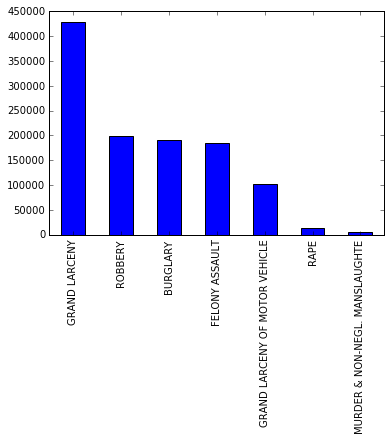

In [7]:
felony_df.Offense.value_counts().plot(kind = "bar")

# Grand larceny = theft of personal property having a value above a legally specified amount.
# robbery = the taking of another person's property by force, fear, or 
            # intimidation, with the intent to permanently deprive that person of the property.
# Burglary = typically defined as the unlawful entry into almost any structure 
            # (not just a home or business) with the intent to commit any crime inside 
            # (not just theft/larceny). No physical breaking and entering is required; 
            # the offender may simply trespass through an open door. Unlike robbery, 
            # which involves use of force or fear to obtain another person's property, 
            # there is usually no victim present during a burglary. 
# Assault = carried out by a threat of bodily harm coupled with an apparent, 
            # present ability to cause the harm.
# Grand Larceny of Motor Vehicle = the unlawful taking of property—in this case, a vehicle— 
            # that belongs to someone else, done with the intent to permanently deprive the 
            # owner of the property.
# Rape = non-consensual sexual intercourse that is committed by physical force, 
            # threat of injury, or other duress
# Murder & Non-negligent Manslaughter = The unjustifiable, inexcusable, and intentional 
            # killing of a human being with (murder) or without (non-negligent) deliberation, premeditation, and malice.

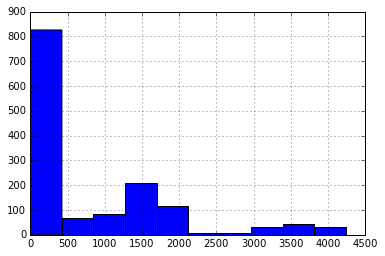

In [8]:
group_dates = felony_df.groupby(["Occurrence Year", "Occurrence Month", "Offense"])
group_dates.Offense.value_counts().hist()

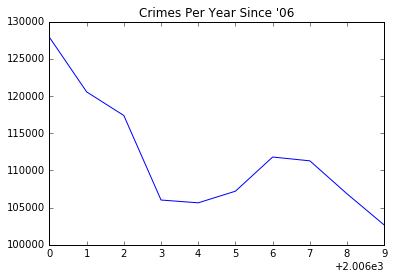

In [9]:
felony_df[felony_df["Occurrence Year"]>2005]["Occurrence Year"].value_counts().sort_index().plot(title = "Crimes Per Year Since '06")

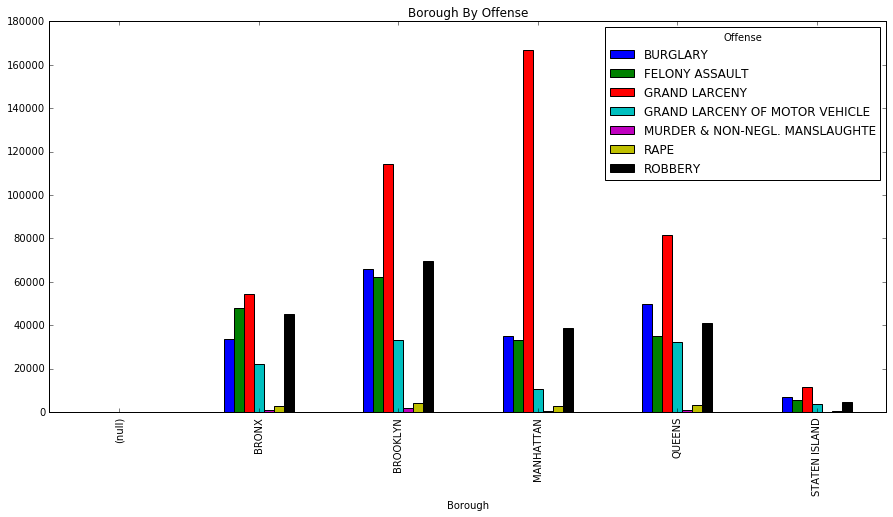

In [10]:
# Aaron will create plot comparing types of Felonies by Borough
fel_by_bor = felony_df.groupby('Borough')['Offense'].value_counts().sort_values(ascending=False)
fel_by_bor_un = fel_by_bor.unstack("Offense")
fel_by_bor_un.sort_index(ascending=False, level = 'GRAND LARCENY')
fel_by_bor_un.plot(kind="bar", figsize= (15,7), title = "Borough By Offense")

In [11]:
# CLEAN UP incidents with and without weapons. It wasn't exported correctly previously.

# inc_cols = [cols for cols in school_df.columns if cols.startswith("Inc")]
# school_df.drop(inc_cols, axis=1, inplace=True)

nw_cols = [cols for cols in school_df.columns if 'nw' in cols]
school_df[nw_cols].sum(axis=1)
school_df["Incidents w/out weapons"] = school_df[nw_cols].sum(axis=1)

ww_cols = [cols for cols in school_df.columns if 'ww' in cols]
school_df[ww_cols].sum(axis=1)
school_df["Incidents w/ weapons"] = school_df[ww_cols].sum(axis=1)

inc_cols = [cols for cols in school_df.columns if cols.startswith("Inc")]
#school_df.drop(inc_cols[1], inplace = True, axis=1)
school_df[inc_cols].head()

,Incidents w/ Weapons,Incidents w/ Weapons.1,Incidents w/out weapons,Incidents w/ weapons
0,0.0,0.0,0.0,0.0
1,8.0,8.0,8.0,0.0
2,0.0,0.0,0.0,0.0
3,5.0,5.0,5.0,0.0
4,27.0,27.0,27.0,0.0


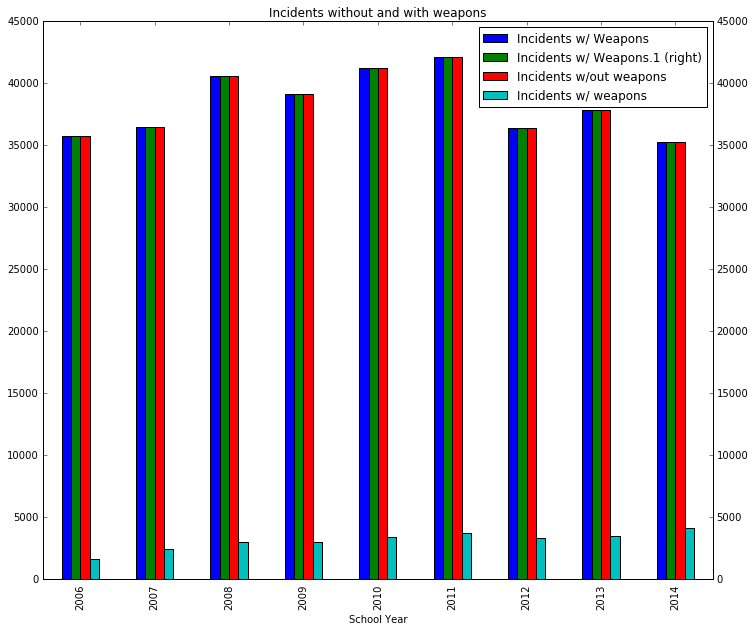

In [14]:
fig = school_df.groupby("School Year")[inc_cols].sum().plot(kind="bar", figsize = (12, 10), 
                                                      secondary_y = inc_cols[1], legend=True,
                                                      xticks = range(2006,2016), 
                                                      title = "Incidents without and with weapons"
                                                      )

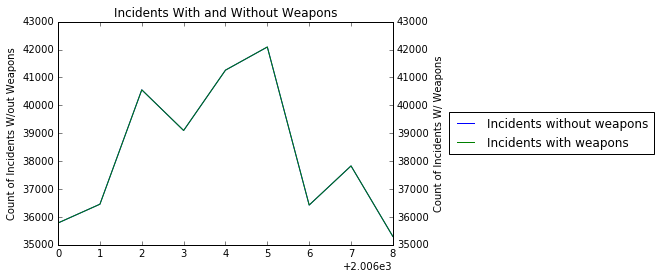

In [13]:
fig, ax = plt.subplots()

ax.plot(list(set(school_df["School Year"])), 
        school_df.groupby("School Year")[inc_cols[0]].sum(),
        'b',
       label = "Incidents without weapons")
ax.set_ylabel("Count of Incidents W/out Weapons")

ax2 = ax.twinx()
ax2.plot(list(set(school_df["School Year"])), 
        school_df.groupby("School Year")[inc_cols[1]].sum(),
         'g',
       label = "Incidents with weapons")
ax2.set_ylabel("Count of Incidents W/ Weapons")

lines = ax.get_lines() + ax2.get_lines()
ax.legend(lines, [line.get_label() for line in lines], loc = "center left", bbox_to_anchor = (1.15, 0.5))
ax.set_title("Incidents With and Without Weapons")
plt.show()

## Find lat lons for school addresses

In [22]:
school_df.columns

Index(['County', 'District', 'School Name', 'School Year', 'Enrollment',
       'BEDS Code', 'Grade Organization', 'School Type', 'Total Incidents',
       'Incidents w/ Weapons', 'Incidents w/ Weapons.1', 'Alcohol Possession',
       'Arson', 'Assault With Serious Physical Injury_nw',
       'Assault With Serious Physical Injury_ww',
       'Assault with Physical Injury_nw', 'Assault with Physical Injury_ww',
       'Bomb Threat', 'Bomb Threat False Alarm', 'Burglary_nw', 'Burglary_ww',
       'Criminal Mischief_nw', 'Criminal Mischief_ww', 'Drug Possession',
       'Forcible Sex Offenses_nw', 'Forcible Sex Offenses_ww', 'Homicide_nw',
       'Homicide_ww', 'Intimidation, Harassment, Menacing, or Bullying_nw',
       'Intimidation, Harassment, Menacing, or Bullying_ww', 'Kidnapping_nw',
       'Kidnapping_ww', 'Larceny, or Other Theft_nw',
       'Larceny, or Other Theft_ww', 'Minor Altercations_nw',
       'Minor Altercations_ww', 'Other Disruptive Incidents',
       'Other Sex Offen

In [47]:
g = geo.google("Academic Leadership Charter School, Bronx, NY")
print(g.latlng)

s = geo.google("677 E 141st St, Bronx, NY 10454")
print(s.latlng)

f = geo.google("Bronx Little Elementary School, Bronx, NY")
print(f.latlng)

[40.8370495, -73.86542949999999]
[40.8077306, -73.9127678]
[40.8370495, -73.86542949999999]


In [50]:
location_df = pd.read_csv("Location_Information_Report.csv")
location_df.head()

,School Year,ATS System Code,Location Code,Location Name,BEDS Number,Managed By Name,Location Type Description,Location Category Description,Grades,Grades Final,...,BFSC Director Email,HighSchool Network Location Code,HighSchool Network Name,HighSchool Network Superintendent,HighSchool Network Superintendent Email,PROSE SCHOOL,X Coordinate,Y Coordinate,Latitude,Longitude
0,2015-16,01M015,M015,P.S. 015 Roberto Clemente,3.101000e+11,DOE,General Academic,Elementary,"PK,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",...,YChu@schools.nyc.gov,NaN,NaN,NaN,NaN,N,990141.0,202349.0,40.722075,-73.978747
1,2015-16,01M019,M019,P.S. 019 Asher Levy,3.101000e+11,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",...,YChu@schools.nyc.gov,NaN,NaN,NaN,NaN,N,988547.0,205239.0,40.730009,-73.984496
2,2015-16,01M020,M020,P.S. 020 Anna Silver,3.101000e+11,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",...,YChu@schools.nyc.gov,NaN,NaN,NaN,NaN,N,988044.0,202068.0,40.721305,-73.986312
3,2015-16,01M034,M034,P.S. 034 Franklin D. Roosevelt,3.101000e+11,DOE,General Academic,K-8,"PK,0K,01,02,03,04,05,06,07,08,SE","PK,0K,01,02,03,04,05,06,07,08",...,YChu@schools.nyc.gov,NaN,NaN,NaN,NaN,N,991163.0,203782.0,40.726008,-73.975058
4,2015-16,01M063,M063,The STAR Academy - P.S.63,3.101000e+11,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",...,YChu@schools.nyc.gov,NaN,NaN,NaN,NaN,N,988071.0,203210.0,40.724440,-73.986214


In [51]:
location_df.describe()

,BEDS Number,Zip,Geographical District Code,Administrative District Code,HighSchool Network Location Code,HighSchool Network Name,HighSchool Network Superintendent,HighSchool Network Superintendent Email,X Coordinate,Y Coordinate,Latitude,Longitude
count,1.626000e+03,1641.000000,1641.000000,1641.000000,0.0,0.0,0.0,0.0,1.640000e+03,1640.000000,1640.000000,1640.000000
mean,3.276432e+11,10801.010360,15.884217,17.893967,NaN,NaN,NaN,NaN,1.006042e+06,206965.077439,40.611028,-73.693795
std,1.273472e+10,533.114518,9.408546,14.167327,NaN,NaN,NaN,NaN,3.358394e+04,31703.865968,2.248118,4.077331
min,3.075000e+11,10001.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,-74.243950
25%,3.207250e+11,10451.000000,8.000000,9.000000,NaN,NaN,NaN,NaN,9.937205e+05,184179.750000,40.671857,-73.965611
50%,3.314000e+11,11106.000000,15.000000,16.000000,NaN,NaN,NaN,NaN,1.006196e+06,203760.500000,40.725950,-73.920630
75%,3.424000e+11,11232.000000,24.000000,25.000000,NaN,NaN,NaN,NaN,1.018650e+06,237064.500000,40.817351,-73.875375
max,3.531000e+11,11791.000000,32.000000,75.000000,NaN,NaN,NaN,NaN,1.065003e+06,268380.000000,40.903275,0.000000


In [67]:
loc_beds = location_df["BEDS Number"].astype(str)
sch_beds = school_df["BEDS Code"].astype(str)
[x for x in loc_beds if not np.isnan(x) and x in sch_beds]

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''